In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3000

zmin = 1
zmax = 1.3

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_Kkappa = get_f_Kkappa()


f_KLIM   = interp1d(x=chis, y = KI_HI, bounds_error = False, fill_value=0)
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
oup_fname = '/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_3000_zmin_1.0_zmax_1.3.npy


In [3]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

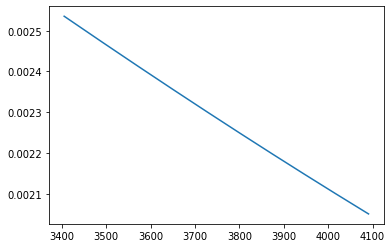

In [4]:
import matplotlib.pyplot as plt
plt.plot(external_chis, f_KLIM(external_chis))

In [5]:
from scipy.interpolate import LinearNDInterpolator


In [6]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [7]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [8]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [9]:
from scipy.integrate import quad_vec

In [10]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3000/3000 [10:25<00:00,  4.80it/s] 


In [11]:
import matplotlib.pyplot as plt

In [12]:
np.save(oup_fname, unfiltered_auto)

7.990452391170386e-10 7.990452391170386e-10


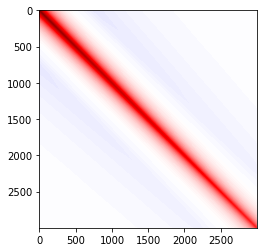

8.001034585782112e-10 8.001034585782112e-10


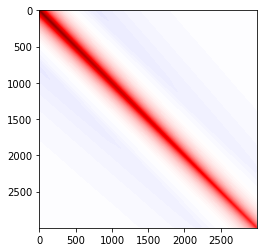

8.011897724776121e-10 8.011897724776121e-10


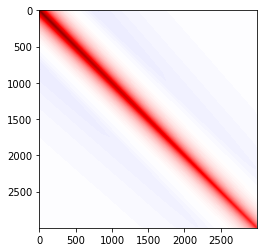

8.022961435508582e-10 8.022961435508582e-10


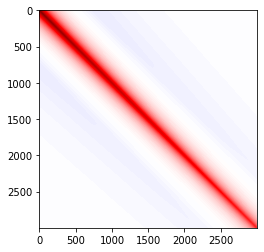

8.034124782288843e-10 8.034124782288843e-10


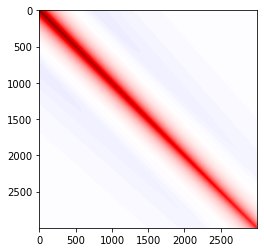

8.04526331203477e-10 8.04526331203477e-10


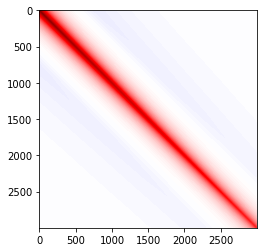

8.056225920555279e-10 8.056225920555279e-10


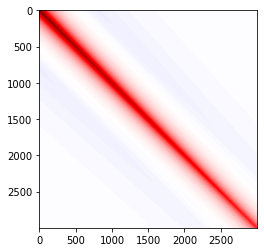

8.06683150032937e-10 8.06683150032937e-10


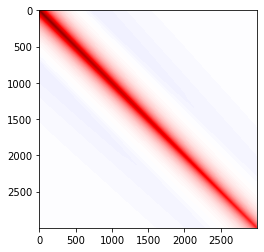

8.076865383979791e-10 8.076865383979791e-10


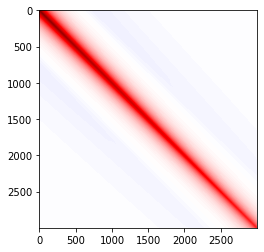

8.086075776450756e-10 8.086075776450756e-10


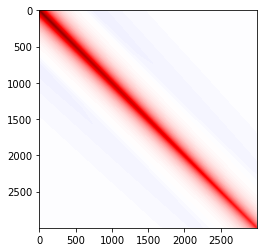

8.094170121642611e-10 8.094170121642611e-10


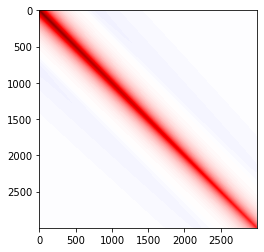

8.100811624459286e-10 8.100811624459286e-10


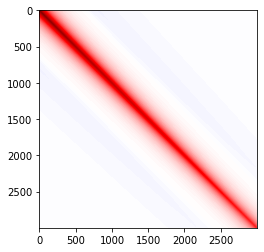

8.105616008357918e-10 8.105616008357918e-10


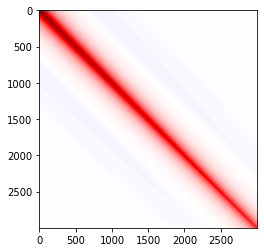

8.108148870904432e-10 8.108148870904432e-10


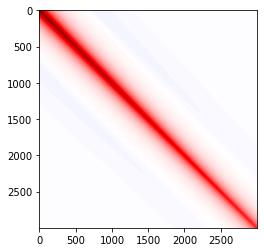

8.107923709297591e-10 8.107923709297591e-10


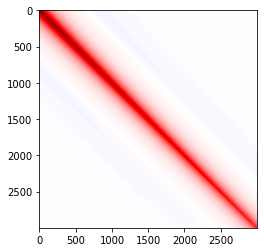

8.104401193808716e-10 8.104401193808716e-10


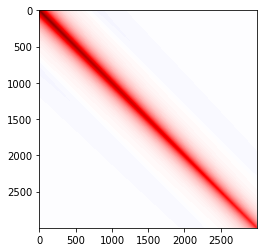

8.096989900315268e-10 8.096989900315268e-10


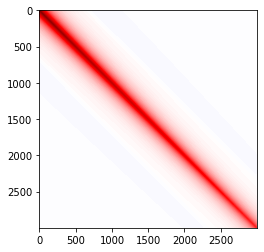

8.085049267345668e-10 8.085049267345668e-10


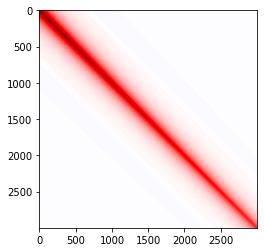

8.067895229200482e-10 8.067895229200482e-10


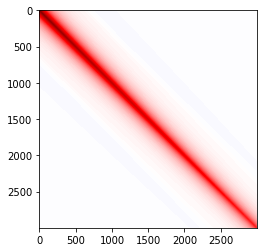

8.044809077293804e-10 8.044809077293804e-10


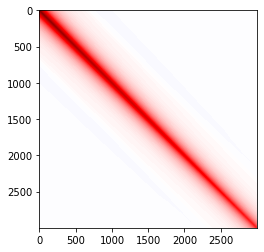

8.015050946302376e-10 8.015050946302376e-10


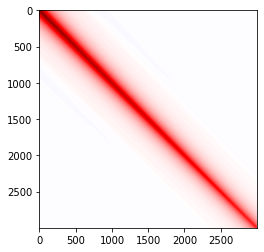

7.977877525602416e-10 7.977877525602416e-10


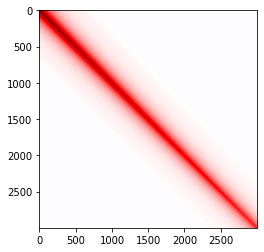

7.932565986367181e-10 7.932565986367181e-10


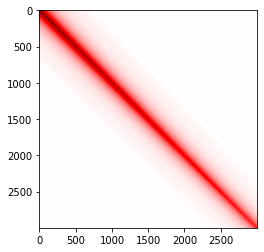

7.878443381765732e-10 7.878443381765732e-10


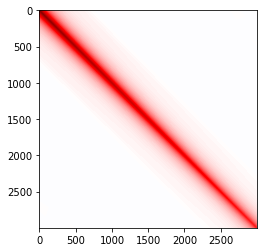

7.814922643817058e-10 7.814922643817058e-10


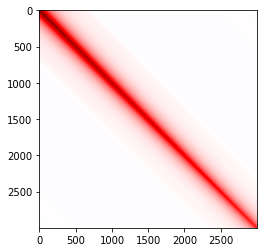

7.741543936400291e-10 7.741543936400291e-10


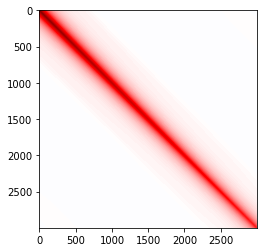

7.65802076406644e-10 7.65802076406644e-10


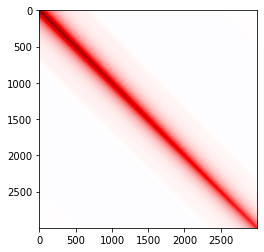

7.564287706359145e-10 7.564287706359145e-10


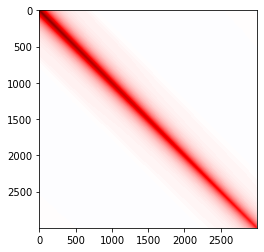

7.460546715322161e-10 7.460546715322161e-10


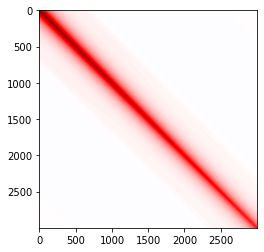

7.347306675914215e-10 7.347306675914215e-10


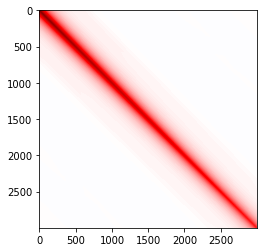

7.225407102936971e-10 7.225407102936971e-10


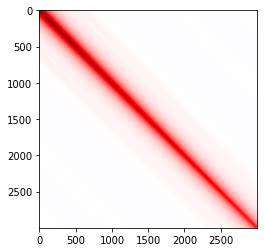

7.096018700893129e-10 7.096018700893129e-10


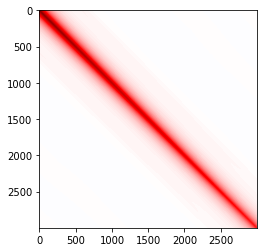

6.960606907950017e-10 6.960606907950017e-10


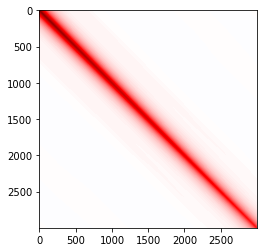

6.820843826704918e-10 6.820843826704918e-10


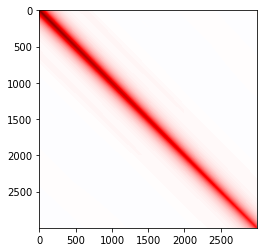

6.678403753140116e-10 6.678403753140116e-10


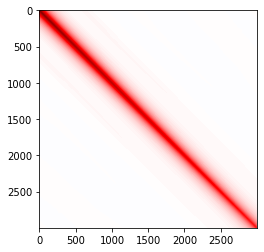

6.534941989605611e-10 6.534941989605611e-10


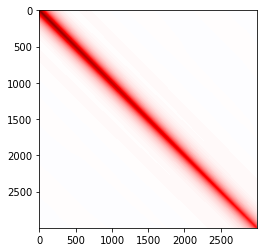

6.392459603225686e-10 6.392459603225686e-10


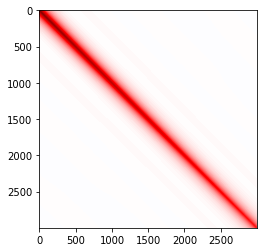

6.251943780231878e-10 6.251943780231878e-10


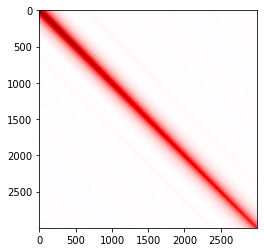

6.113293051545294e-10 6.113293051545294e-10


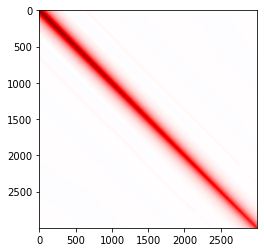

5.975268408641074e-10 5.975268408641074e-10


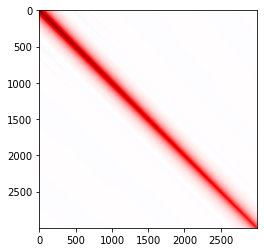

5.835714223235257e-10 5.835714223235257e-10


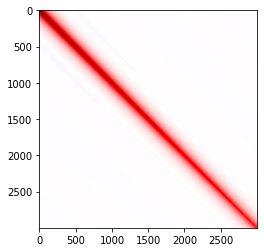

5.6920302856879e-10 5.6920302856879e-10


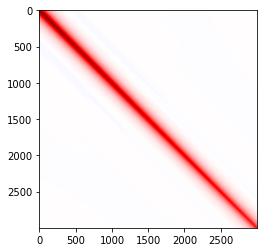

5.541058950146329e-10 5.541058950146329e-10


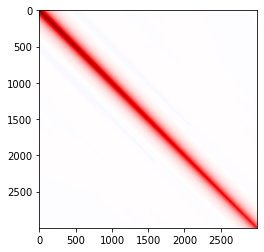

5.376457020049317e-10 5.376457020049317e-10


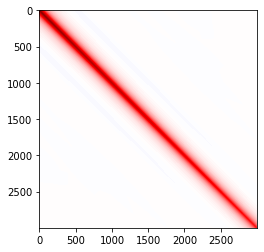

5.196075430744264e-10 5.196075430744264e-10


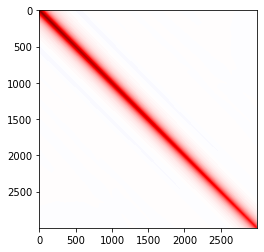

4.998991865008087e-10 4.998991865008087e-10


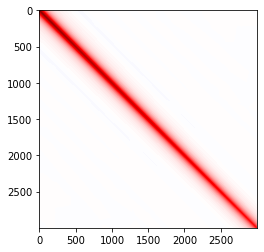

4.788295558102622e-10 4.788295558102622e-10


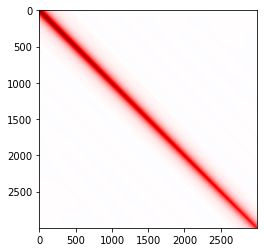

4.57113599722532e-10 4.57113599722532e-10


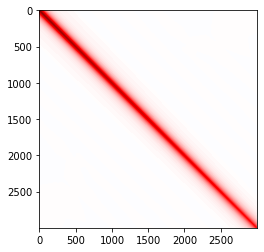

4.357155882584365e-10 4.357155882584365e-10


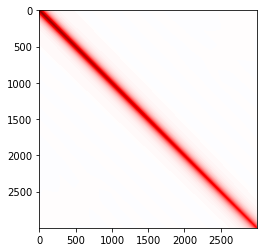

4.1560660258394496e-10 4.1560660258394496e-10


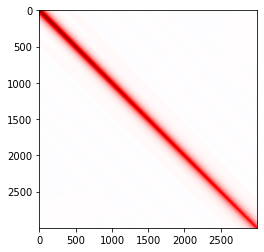

3.9747199115190525e-10 3.9747199115190525e-10


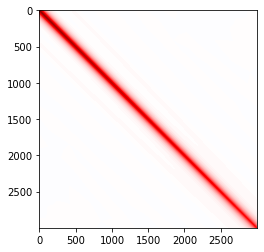

3.813537904460525e-10 3.813537904460525e-10


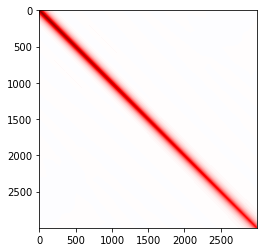

3.664820280543822e-10 3.664820280543822e-10


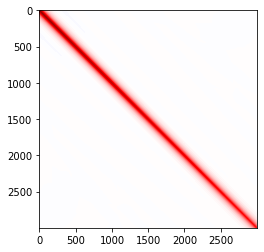

3.5153985230718717e-10 3.5153985230718717e-10


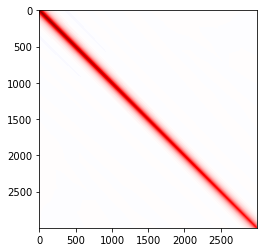

3.3519529527458676e-10 3.3519529527458676e-10


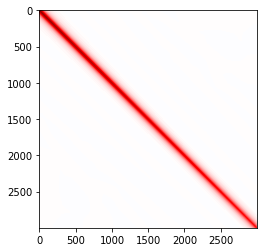

3.169976359253204e-10 3.169976359253204e-10


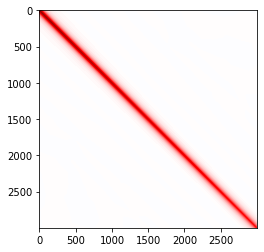

2.981218963028018e-10 2.981218963028018e-10


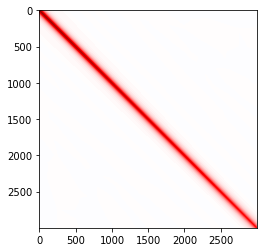

2.804777461198655e-10 2.804777461198655e-10


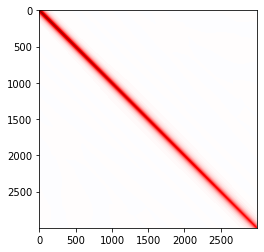

2.6531428449099477e-10 2.6531428449099477e-10


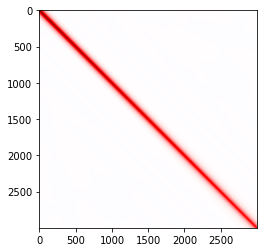

2.5217470393161025e-10 2.5217470393161025e-10


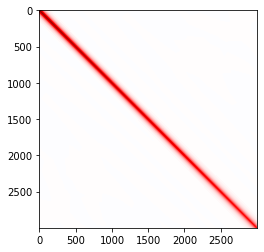

2.391024065085604e-10 2.391024065085604e-10


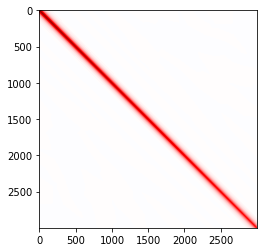

2.247742152298883e-10 2.247742152298883e-10


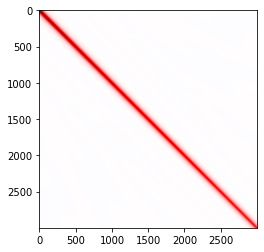

2.0999087335421275e-10 2.0999087335421275e-10


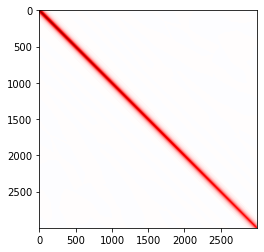

1.9671890388260418e-10 1.9671890388260418e-10


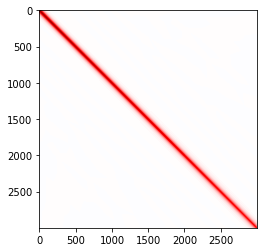

1.8529232143675754e-10 1.8529232143675754e-10


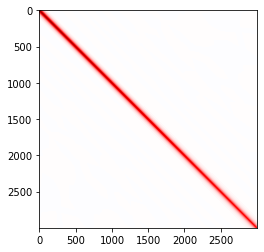

1.7407190775138416e-10 1.7407190775138416e-10


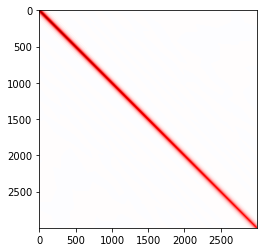

1.623427778992414e-10 1.623427778992414e-10


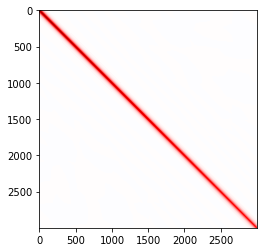

1.5137367405211983e-10 1.5137367405211983e-10


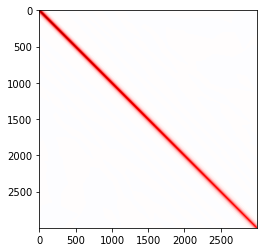

1.416438211163246e-10 1.416438211163246e-10


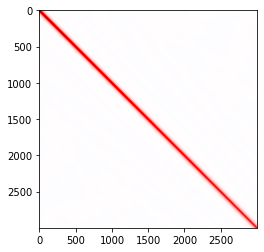

1.321043888197178e-10 1.321043888197178e-10


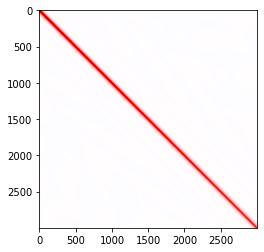

1.2279022435471477e-10 1.2279022435471477e-10


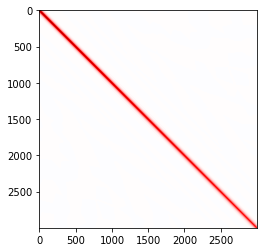

1.1433609572283937e-10 1.1433609572283937e-10


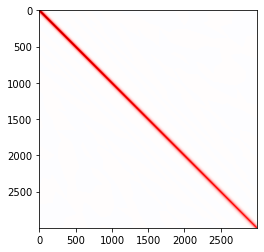

1.0626730088207288e-10 1.0626730088207288e-10


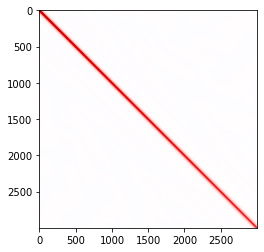

9.858267306009402e-11 9.858267306009402e-11


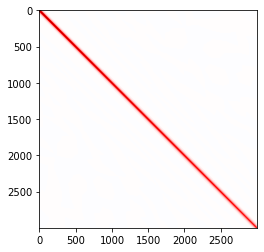

9.147573499357236e-11 9.147573499357236e-11


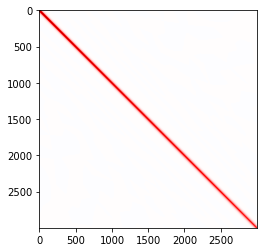

8.472276363548611e-11 8.472276363548611e-11


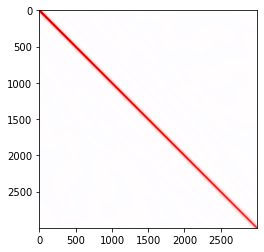

7.843338244383579e-11 7.843338244383579e-11


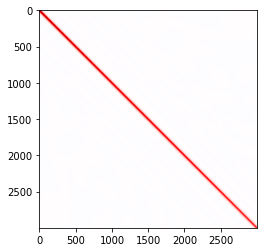

7.252574409546483e-11 7.252574409546483e-11


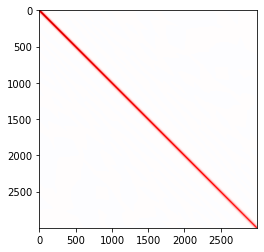

6.701185782402314e-11 6.701185782402314e-11


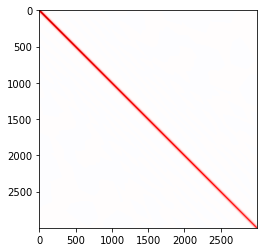

6.185782089220483e-11 6.185782089220483e-11


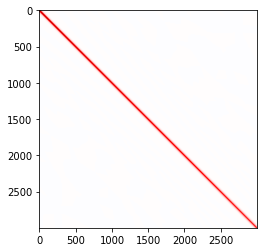

5.705615870821077e-11 5.705615870821077e-11


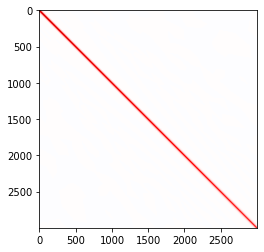

5.2580890304198014e-11 5.2580890304198014e-11


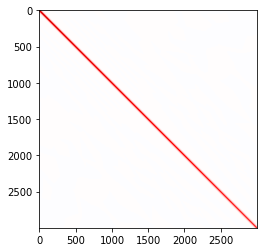

4.8415685278391464e-11 4.8415685278391464e-11


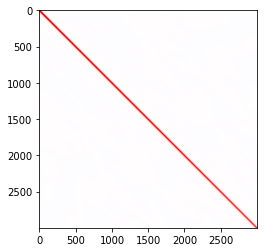

4.454565748931923e-11 4.454565748931923e-11


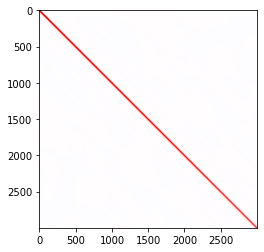

4.09546721699697e-11 4.09546721699697e-11


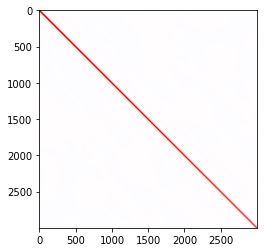

3.7625694400696014e-11 3.7625694400696014e-11


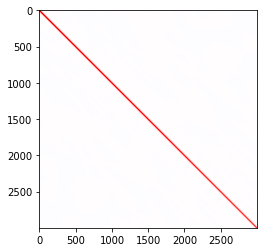

3.454228162106108e-11 3.454228162106108e-11


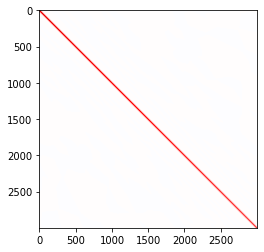

3.16889230111155e-11 3.16889230111155e-11


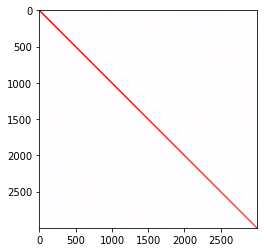

2.9051061163845604e-11 2.9051061163845604e-11


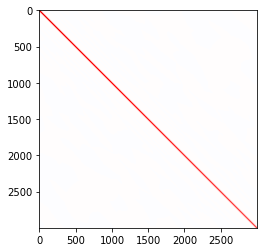

2.6614853355769292e-11 2.6614853355769292e-11


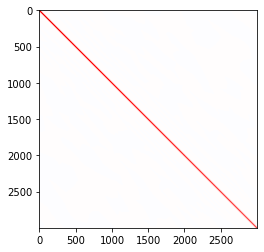

2.4367026814015088e-11 2.4367026814015088e-11


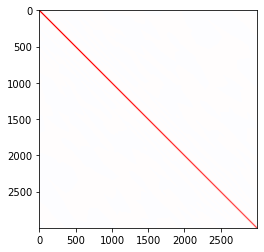

2.229487042581406e-11 2.229487042581406e-11


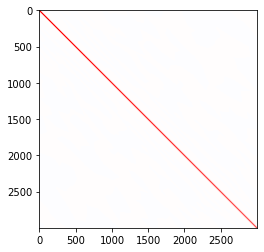

2.0386268375197453e-11 2.0386268375197453e-11


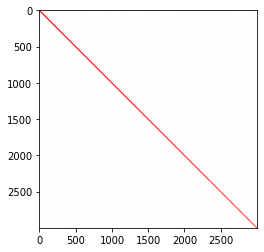

1.8629758584257532e-11 1.8629758584257532e-11


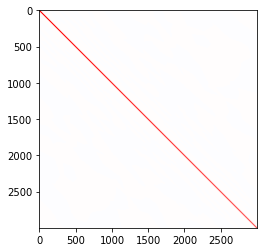

1.7014525004640825e-11 1.7014525004640825e-11


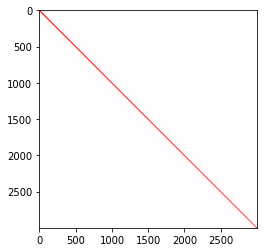

1.5530379335107687e-11 1.5530379335107687e-11


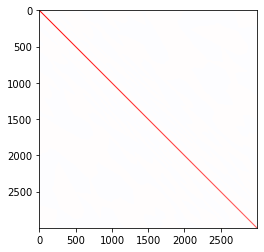

1.4167732833082552e-11 1.4167732833082552e-11


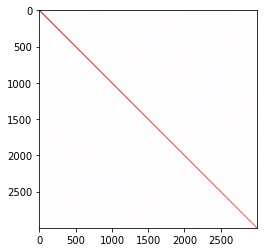

1.2917572933894167e-11 1.2917572933894167e-11


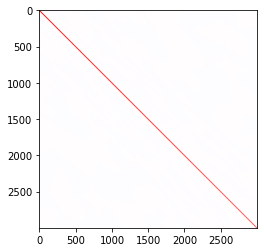

1.1771440480275461e-11 1.1771440480275461e-11


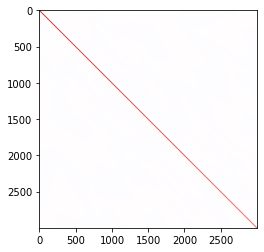

1.0721412942899736e-11 1.0721412942899736e-11


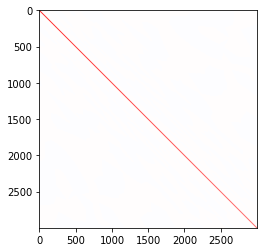

In [13]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()